In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv("customers_dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


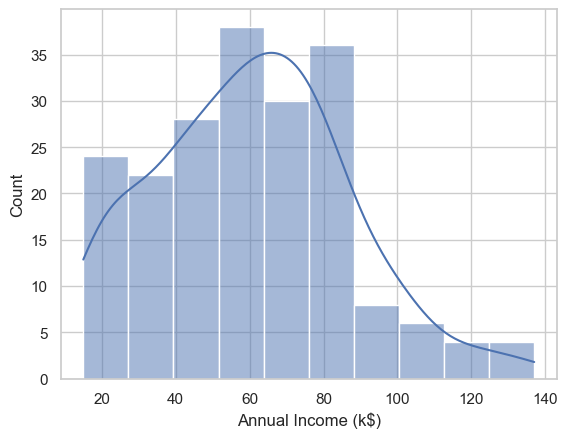

np.float64(0.3218425498619055)

In [77]:
sns.histplot(df["Annual Income (k$)"],kde="True")
plt.show()
df["Annual Income (k$)"].skew()

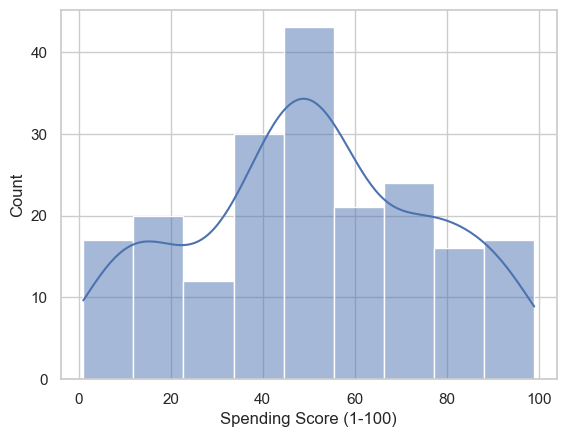

np.float64(-0.047220201374263374)

In [76]:
sns.histplot(df["Spending Score (1-100)"],kde="True")
plt.show()
df["Spending Score (1-100)"].skew()

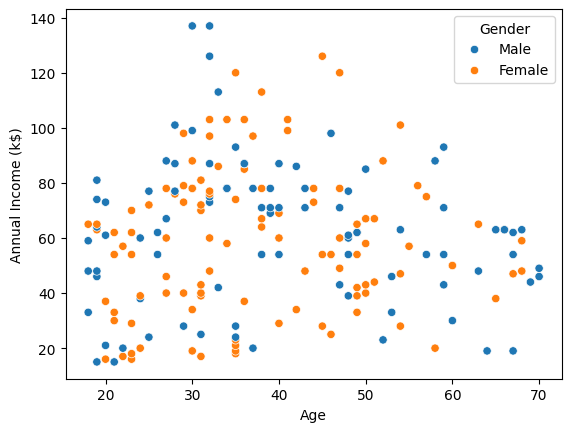

In [57]:
sns.scatterplot(x="Age",y="Annual Income (k$)",data=df,hue="Gender")
plt.show()

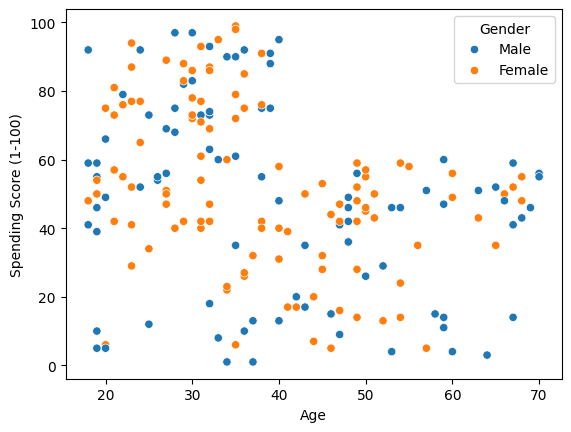

In [58]:
sns.scatterplot(x="Age",y="Spending Score (1-100)",data=df,hue="Gender")
plt.show()

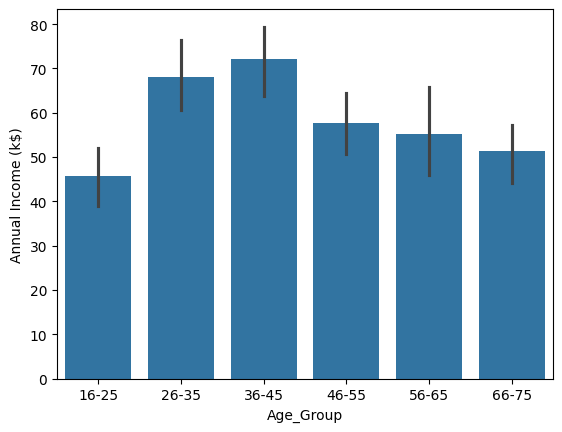

In [65]:
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[15, 25, 35, 45, 55, 65, 75], 
                         labels=['16-25', '26-35', '36-45', '46-55', '56-65', '66-75'])

sns.barplot(x="Age_Group",y="Annual Income (k$)",data=df)
plt.show()

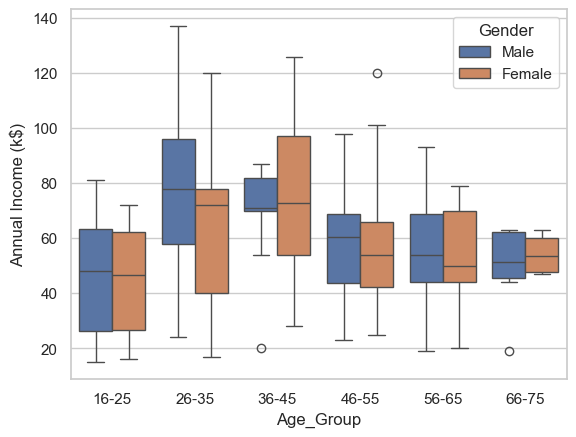

In [70]:

df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[15, 25, 35, 45, 55, 65, 75], 
                         labels=['16-25', '26-35', '36-45', '46-55', '56-65', '66-75'])

sns.boxplot(x="Age_Group",y="Annual Income (k$)",data=df,hue="Gender")
plt.show()

In [71]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group
0,1,Male,19,15,39,16-25
1,2,Male,21,15,81,16-25
2,3,Female,20,16,6,16-25
3,4,Female,23,16,77,16-25
4,5,Female,31,17,40,26-35


before transformation skew value is : 0.3218425498619055
after transformation skew value is : -0.7359971613306433


Text(0.5, 1.0, 'After Transformation')

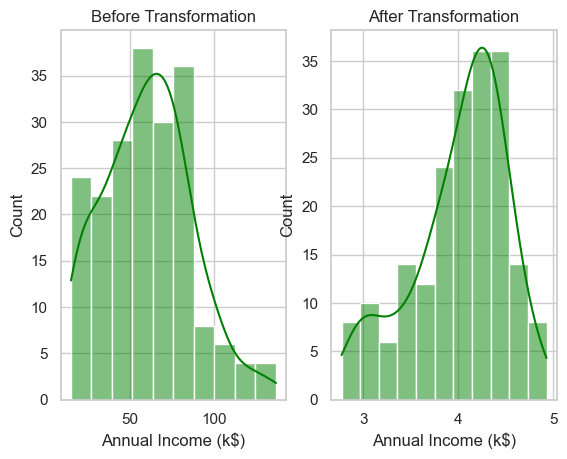

In [99]:
log_transform = lambda x : np.log1p(x)

df['Annual Income (k$)'].apply(log_transform)

print('before transformation skew value is :', df['Annual Income (k$)'].skew())
print('after transformation skew value is :',np.log1p(df['Annual Income (k$)']).skew())

fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1)
sns.histplot((df['Annual Income (k$)']), ax=ax1, color='green', kde=True)
sns.histplot(np.log1p(df['Annual Income (k$)']), ax=ax2, color='green', kde=True)
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

before transformation skew value is : 0.3218425498619055
after transformation skew value is : -0.23028952579486217


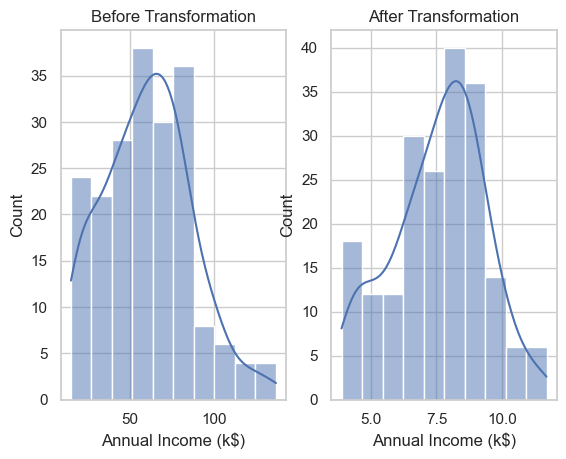

In [98]:
sqrt_transform = lambda x : np.sqrt(x)

df['Annual Income (k$)'].apply(sqrt_transform)

print('before transformation skew value is :', df['Annual Income (k$)'].skew())
print('after transformation skew value is :',np.sqrt(df['Annual Income (k$)']).skew())

fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1)
sns.histplot((df['Annual Income (k$)']), ax=ax1,kde="True")
sns.histplot(np.sqrt(df['Annual Income (k$)']), ax=ax2,kde="True")
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')
plt.show()

In [81]:
from scipy.stats import skew

from sklearn.preprocessing import power_transform

box = power_transform(df[['Annual Income (k$)']], method='box-cox')

print('before transformation skew value is :', df['Annual Income (k$)'].skew())
print('after transformation skew value is :', (skew(box)))

before transformation skew value is : 0.3218425498619055
after transformation skew value is : [-0.0659024]


Text(0.5, 1.0, 'After Transformation')

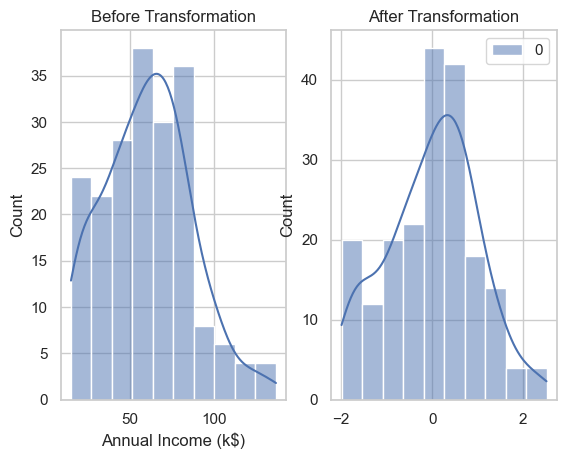

In [105]:
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1)
sns.histplot((df['Annual Income (k$)']), ax=ax1,kde="True")
sns.histplot(box, ax=ax2,kde="True")
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

In [123]:
from scipy.stats import skew
from sklearn.preprocessing import power_transform
you= power_transform(df[["Annual Income (k$)"]],method="yeo-johnson")

print("before transformation skew value is :",df["Annual Income (k$)"].skew())
print("after transformation skew value is :",skew(you))


before transformation skew value is : 0.3218425498619055
after transformation skew value is : [-0.0633006]


Text(0.5, 1.0, 'After Transformation')

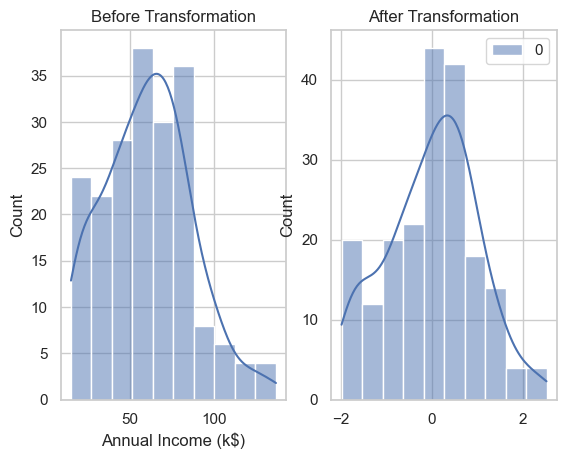

In [108]:
fig,[ax1,ax2]=plt.subplots(ncols=2,nrows=1)
sns.histplot(df["Annual Income (k$)"],ax=ax1,kde="True")
sns.histplot(you,ax=ax2,kde="True")
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation')

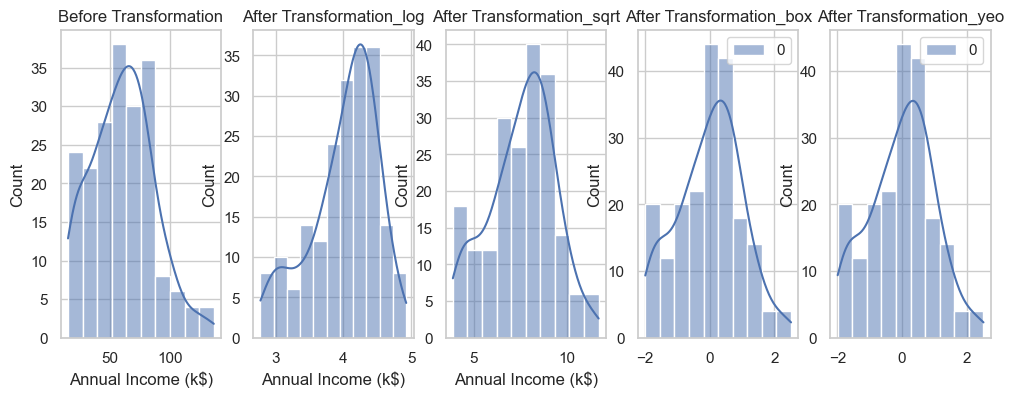

In [118]:
fig, [ax1, ax2,ax3,ax4,ax5] = plt.subplots(ncols=5,figsize=(12, 4))
sns.histplot((df['Annual Income (k$)']), ax=ax1,kde="True")
sns.histplot(np.log1p(df["Annual Income (k$)"]), ax=ax2,kde="True")
sns.histplot(np.sqrt(df["Annual Income (k$)"]), ax=ax3,kde="True")
sns.histplot(box, ax=ax4,kde="True")
sns.histplot(you, ax=ax5,kde="True")
ax1.set_title('Before Transformation')
ax2.set_title('After Transformation_log')
ax3.set_title('After Transformation_sqrt')
ax4.set_title('After Transformation_box')
ax5.set_title('After Transformation_yeo')
plt.show()

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

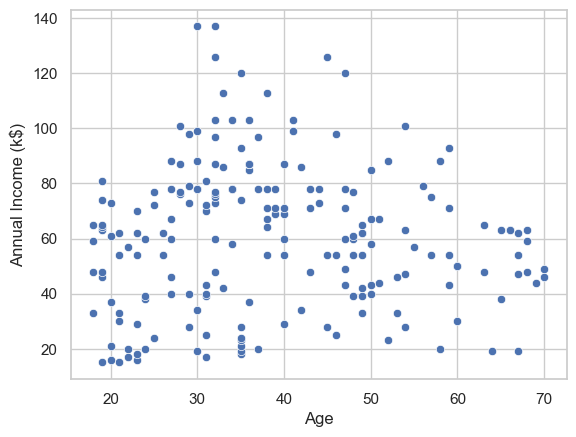

In [125]:
sns.scatterplot(x=df["Age"],y=df["Annual Income (k$)"])

In [126]:
from sklearn.cluster import KMeans

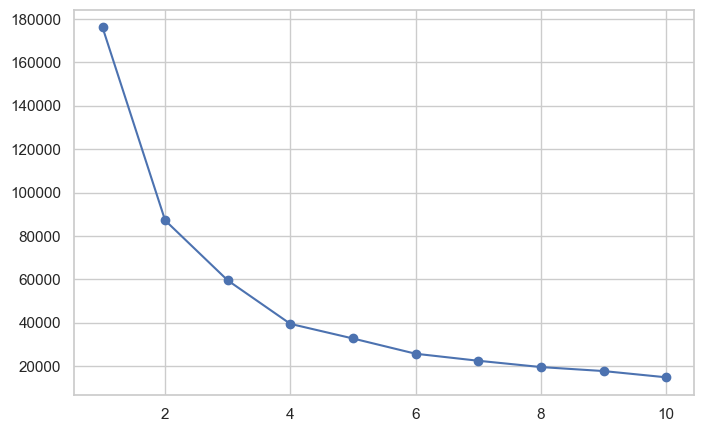

In [152]:
##ai
X = df[["Age", "Annual Income (k$)"]]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')

plt.show()


In [132]:
X = df[["Age", "Annual Income (k$)"]]
kmeans = KMeans(n_clusters=4, random_state=42)
df["Clust"]=kmeans.fit_predict(X)
df.head

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Clust
0,1,Male,19,15,39,16-25,2
1,2,Male,21,15,81,16-25,2
2,3,Female,20,16,6,16-25,2
3,4,Female,23,16,77,16-25,2
4,5,Female,31,17,40,26-35,2


In [135]:
df1=df[df.Clust==0]
df2=df[df.Clust==1]
df3=df[df.Clust==2]
df4=df[df.Clust==3]


df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Clust
8,9,Male,64,19,3,56-65,0
10,11,Male,67,19,14,66-75,0
24,25,Female,54,28,14,46-55,0
30,31,Male,60,30,4,56-65,0
32,33,Male,53,33,4,46-55,0


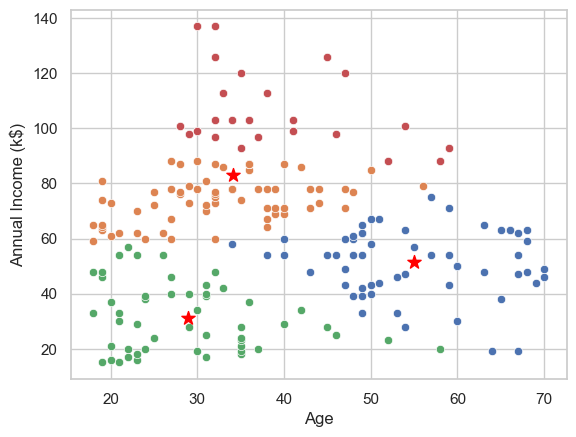

In [162]:
sns.scatterplot(x=df["Age"],y=df1["Annual Income (k$)"])
sns.scatterplot(x=df["Age"],y=df2["Annual Income (k$)"])
sns.scatterplot(x=df["Age"],y=df3["Annual Income (k$)"])
sns.scatterplot(x=df["Age"],y=df4["Annual Income (k$)"])

centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroids')

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
scaler=MinMaxScaler()
df["Annual_n"]=scaler.fit_transform(df[["Annual Income (k$)"]])
df["Age_n"]=scaler.fit_transform(df[["Age"]])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Clust,Annual_n,Age_n
0,1,Male,19,15,39,16-25,2,0.000000,0.019231
1,2,Male,21,15,81,16-25,2,0.000000,0.057692
2,3,Female,20,16,6,16-25,2,0.008197,0.038462
3,4,Female,23,16,77,16-25,2,0.008197,0.096154
4,5,Female,31,17,40,26-35,2,0.016393,0.250000
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,26-35,3,0.860656,0.326923
196,197,Female,45,126,28,36-45,3,0.909836,0.519231
197,198,Male,32,126,74,26-35,3,0.909836,0.269231
198,199,Male,32,137,18,26-35,3,1.000000,0.269231


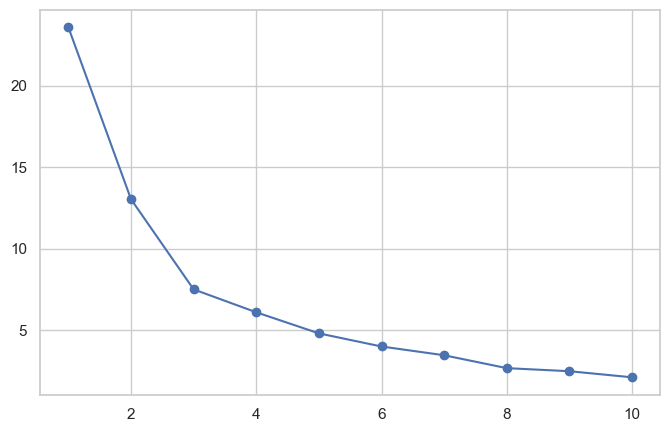

In [169]:
X = df[["Age_n", "Annual_n"]]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')

plt.show()


In [165]:
X = df[["Age_n", "Annual Income (k$)"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Clust_n"]=kmeans.fit_predict(X)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Clust,Annual_n,Age_n,Clust_n
0,1,Male,19,15,39,16-25,2,0.000000,0.019231,2
1,2,Male,21,15,81,16-25,2,0.000000,0.057692,2
2,3,Female,20,16,6,16-25,2,0.008197,0.038462,2
3,4,Female,23,16,77,16-25,2,0.008197,0.096154,2
4,5,Female,31,17,40,26-35,2,0.016393,0.250000,2


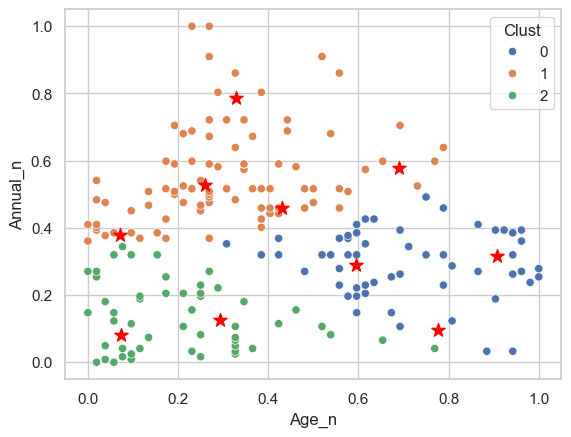

In [178]:
#df1=df[df.Clust==0]
#df2=df[df.Clust==1]
#df3=df[df.Clust==2]
#sns.scatterplot(x=df["Age_n"],y=df1["Annual_n"])
#sns.scatterplot(x=df["Age_n"],y=df2["Annual_n"])
#sns.scatterplot(x=df["Age_n"],y=df3["Annual_n"])#

sns.scatterplot(x='Age_n', y='Annual_n', hue='Clust', data=df, palette='deep')

centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=100, label='Centroids')

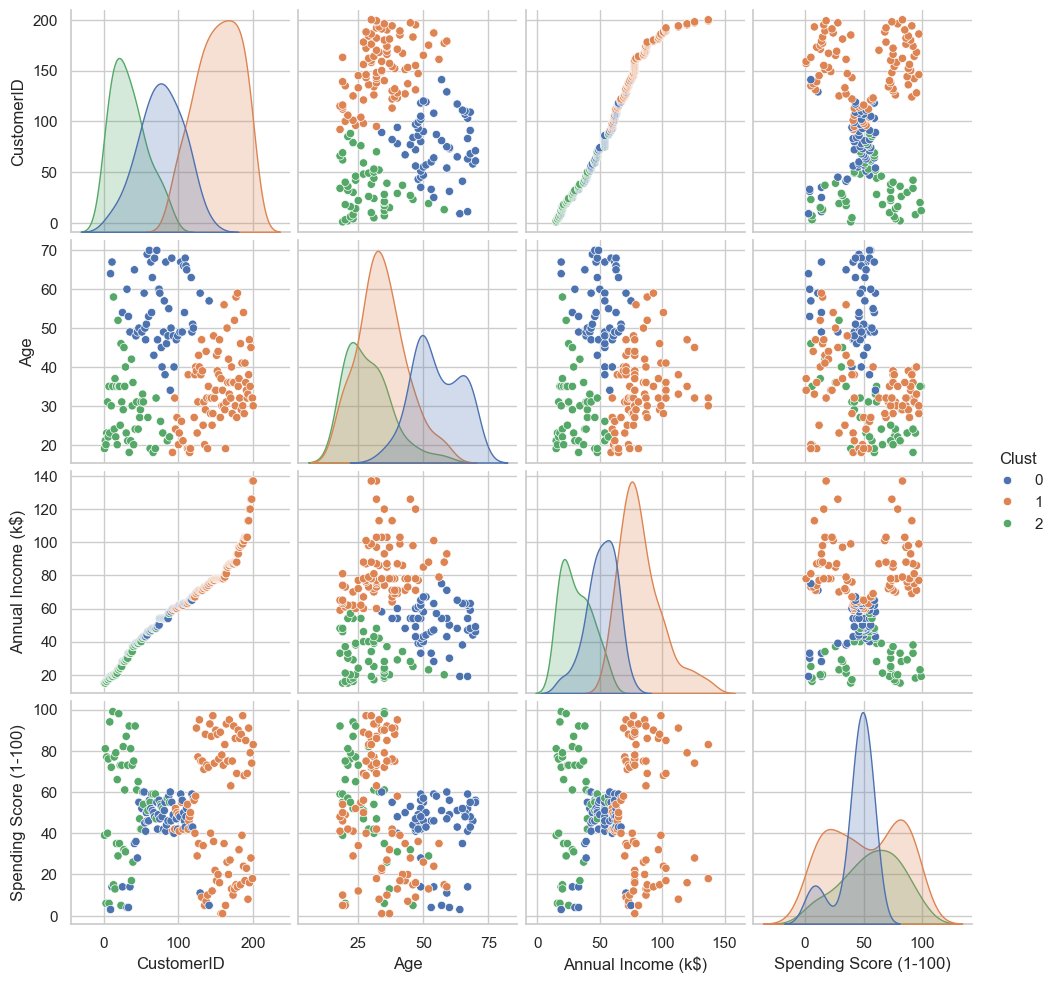

In [180]:
sns.pairplot(df.drop(["Age_Group","Annual_n","Age_n","Clust_n"],axis="columns"),hue="Clust",palette="deep")